In [1]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

11490434/11490434 [==============================] - 0s 0us/step
(28, 28)
784
Epoch 1/10
235/235 [==============================] - 7s 11ms/step - loss: 0.2903 - accuracy: 0.9120 - val_loss: 0.1491 - val_accuracy: 0.9538
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1007 - accuracy: 0.9688 - val_loss: 0.0962 - val_accuracy: 0.9700
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0633 - accuracy: 0.9800 - val_loss: 0.0756 - val_accuracy: 0.9758
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0434 - accuracy: 0.9865 - val_loss: 0.0745 - val_accuracy: 0.9769
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0316 - accuracy: 0.9901 - val_loss: 0.0659 - val_accuracy: 0.9800
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0222 - accuracy: 0.9930 - val_loss: 0.0933 - val_accuracy: 0.9735
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - l

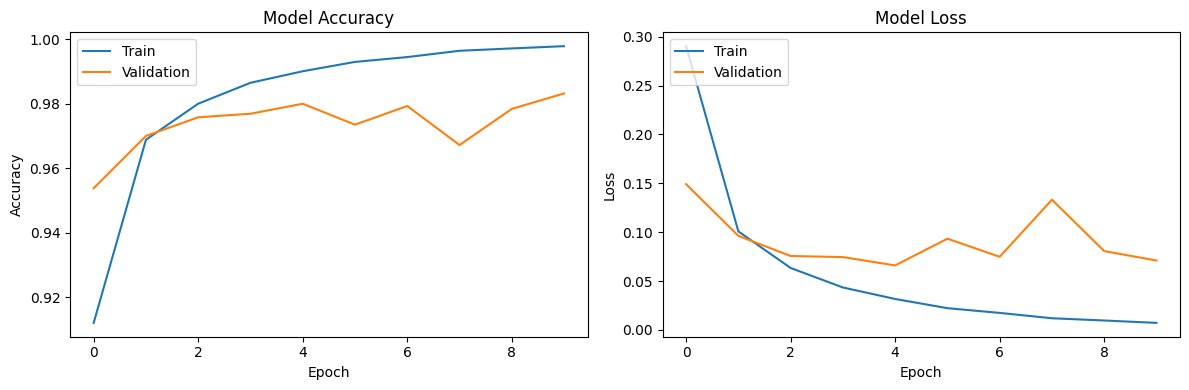

In [2]:
import matplotlib.pyplot as plt

# training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

#training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


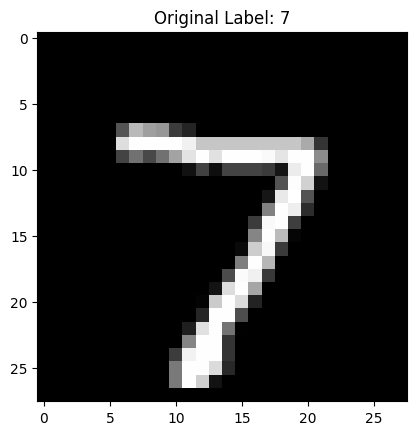

1/1 [==============================] - 0s 104ms/step
Predicted Label: 7


In [3]:

# Plot one of the images in the test data
index = 0  # You can change this to any index to see a different image
plt.imshow(test_images[index], cmap='gray')
plt.title(f'Original Label: {test_labels[index]}')
plt.show()

# Prepare the image for prediction
image = test_data[index].reshape(1, -1)

# Do inferencing to check the model's prediction
prediction = model.predict(image)
predicted_label = np.argmax(prediction)

print(f'Predicted Label: {predicted_label}')


In [4]:
#3. We had used 2 hidden layers and Relu activation. Try to change the number of hidden layer and the
#activation to tanh or sigmoid and see what happens.

from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

(28, 28)
784
Epoch 1/10
235/235 [==============================] - 2s 5ms/step - loss: 0.2917 - accuracy: 0.9095 - val_loss: 0.1141 - val_accuracy: 0.9631
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0927 - accuracy: 0.9714 - val_loss: 0.0988 - val_accuracy: 0.9693
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0576 - accuracy: 0.9822 - val_loss: 0.1511 - val_accuracy: 0.9535
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0419 - accuracy: 0.9867 - val_loss: 0.0741 - val_accuracy: 0.9784
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0281 - accuracy: 0.9909 - val_loss: 0.0744 - val_accuracy: 0.9787
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0210 - accuracy: 0.9931 - val_loss: 0.0630 - val_accuracy: 0.9828
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0178 - accuracy: 0.9939 - val_loss: 0.0914 - val_accuracy: 

In [5]:
#4. Run the same code without scaling the images and check the performance?

from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

(28, 28)
784
Epoch 1/10
235/235 [==============================] - 2s 7ms/step - loss: 6.9097 - accuracy: 0.8729 - val_loss: 0.7449 - val_accuracy: 0.9222
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.4264 - accuracy: 0.9456 - val_loss: 0.4365 - val_accuracy: 0.9334
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2463 - accuracy: 0.9598 - val_loss: 0.2729 - val_accuracy: 0.9460
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1904 - accuracy: 0.9676 - val_loss: 0.3322 - val_accuracy: 0.9517
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1694 - accuracy: 0.9716 - val_loss: 0.2527 - val_accuracy: 0.9643
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1510 - accuracy: 0.9753 - val_loss: 0.2424 - val_accuracy: 0.9696
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1303 - accuracy: 0.9789 - val_loss: 0.3632 - val_accuracy: 